## Лабораторная работа №2

### Тарасенко Андрей, БПМ161, Вариант 23

#### Задание 2.1.23

Даны два уравнения f(x) = 0 и g(x) = 0. Найти с точностью ε = 10^-10 все корни уравнений,
содержащиеся на отрезке [a, b]. Для решения задачи использовать метод бисекции. Найти корни с помощью
встроенной функции root.

$$f(x) = (lg(x))^2 - lg(x) - \frac{3}{4}$$

$$g(x) = (lg(x))^2 - 3lg(x) + \frac{9}{4}$$

$$[a, b] = [0.1, 35]$$

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

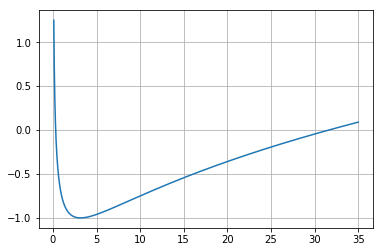

In [51]:
#Графически локализуем корни f
def f(x):
    return (np.log10(x))**2 - np.log10(x) - (3 / 4)

x = np.arange(0.1, 35, 0.001)
y = f(x)

plt.grid(True)
plt.plot(x, y)
plt.show()

# Видно, что у f два корня

In [52]:
#Метод бисекции
delta = 1e-10

def bisec(poly, a, b, delta):
    ai = a
    bi = b
    k = 0
    while((bi - ai) / 2 > delta):
        c = (ai + bi) / 2
        if(poly(ai) * poly(c) < 0):
            bi = c
        else:
            ai = c
        k += 1
    return(c, k)

In [53]:
#Возьмем отрезки локализации [0.1, 5] и [5, 35] и найдем корни
print('x1 = ', bisec(f, 0.1, 5, delta))
print('x2 = ', bisec(f, 5, 35, delta))

x1 =  (0.31622776591393637, 35)
x2 =  (31.62277660176187, 38)


In [54]:
#Проверим корни с помощью функции root
root = optimize.root(f, [0.1, 35])
print('x = ', root.x)

x =  [ 0.31622777 31.6227766 ]


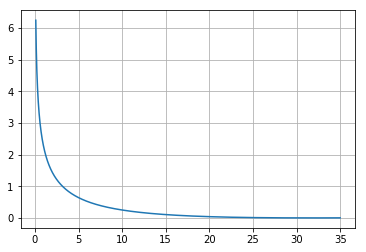

In [55]:
#Теперь функция g, графически локализуем корни
def g(x):
    return (np.log10(x))**2 - 3 * np.log10(x) + (9 / 4)

y = g(x)

plt.grid(True)
plt.plot(x, y)
plt.show()

#Можно заметить, что g раскладывается в полный квадрат, поэтому существует только один корень
#Из графика видно, что корень лежит на отрезке [25, 35]

In [56]:
#Найдем корень с помощью метода бисекции
print('x1 = ', bisec(g, 25, 35, delta))

x1 =  (34.99999999985448, 36)


In [57]:
#Проверим корень с помощью функции root
root = optimize.root(g, [25, 35])
print('x = ', root.x)

x =  [31.62277822 31.62277463]


In [58]:
#Корень для g, найденный методом бесекции не верен, это связано с тем, что корень кратный
#Вследствие чего нельзя выбрать отрезок на котором g меняла бы знак 

#### Задание 2.6.4

Локализовать корни уравнения f(x) = 0. Найти их с точностью ε = 10^-5 и ε = 10^-12 , используя
метод Ньютона и метод секущих. Сравнить скорость сходимости методов (по числу итераций) для каждого значения ε.

In [59]:
#Зададим функцию f
def f(x):
    return np.sqrt(x) * np.exp(np.cos(x)) - 1

#Зададим производную f
def df(x):
    return -np.sqrt(x) * np.sin(x) * np.exp(np.cos(x)) + np.exp(np.cos(x)) / (2 * np.sqrt(x))

#Реализуем метод Ньютона

def newton(x0, f, df, delta):
    k = 0
    while True:
        xn = x0 - f(x0) / df(x0)
        k += 1
        if np.abs(xn - x0) < delta:
            return (xn, k)
        x0 = xn
        
#Реализуем метод секущих
def sec(x0, x1, f, delta):
    k = 0
    while True:
        xn = x1 - (x0 - x1) / (f(x0) - f(x1)) * f(x1)
        k += 1
        if np.abs(xn - x1) < delta:
            return (xn, k)
        x0 = x1
        x1 = xn
    

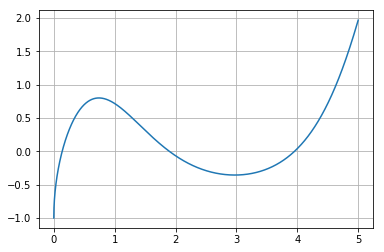

In [60]:
#Графически локализуем корни f
x = np.arange(0, 5, 0.001)
y = f(x)

plt.grid(True)
plt.plot(x, y)
plt.show()

In [61]:
#Найдем корни методом Ньютона(delta = 1e-5)
print('Первый корень: ', newton(0.01, f, df, 1e-5))
print('Второй корень: ', newton(1.5, f, df, 1e-5))
print('Третий корень: ', newton(3.5, f, df, 1e-5))

Первый корень:  (0.13793050341650223, 5)
Второй корень:  (1.8965431395663275, 4)
Третий корень:  (3.9544562369260587, 5)


In [62]:
#Найдем корни методом Ньютона(delta = 1e-12)
print('Первый корень: ', newton(0.01, f, df, 1e-12))
print('Второй корень: ', newton(1.5, f, df, 1e-12))
print('Третий корень: ', newton(3.5, f, df, 1e-12))

Первый корень:  (0.13793050341719648, 6)
Второй корень:  (1.896543139566341, 5)
Третий корень:  (3.9544562369160947, 7)


In [63]:
#Найдем корни методом секущих(delta = 1e-5)
print('Первый корень: ', sec(0.01, 0.02, f, 1e-5))
print('Второй корень: ', sec(1.5, 1.6, f, 1e-5))
print('Третий корень: ', sec(3.5, 3.6, f, 1e-5))

Первый корень:  (0.1379305028179553, 6)
Второй корень:  (1.8965431395645453, 5)
Третий корень:  (3.9544562354133026, 6)


In [64]:
#Найдем корни методом секущих(delta = 1e-12)
print('Первый корень: ', sec(0.01, 0.02, f, 1e-12))
print('Второй корень: ', sec(1.5, 1.6, f, 1e-12))
print('Третий корень: ', sec(3.5, 3.6, f, 1e-12))

Первый корень:  (0.13793050341719645, 8)
Второй корень:  (1.8965431395663408, 7)
Третий корень:  (3.9544562369160947, 8)


In [65]:
#Видно, что скорость сходимости при использовании метода Ньютона выше, чем при методе секущих